# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. 
- Постройте матрицу переходных вероятностей. 
- Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; 
- Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
# Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела.
with open('vim.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-я]','', text)

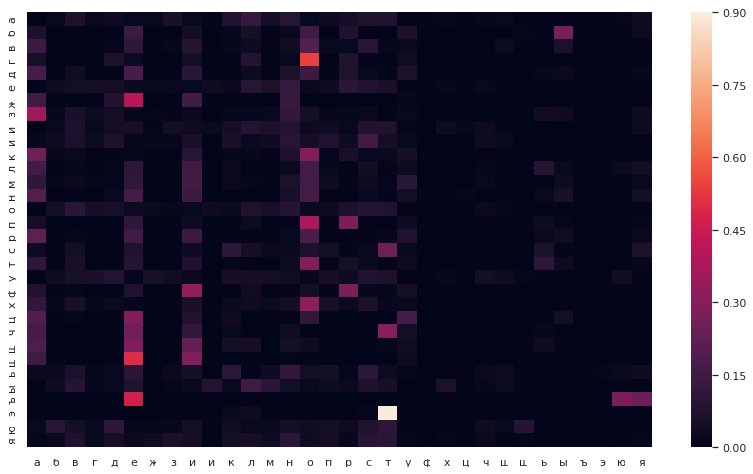

In [3]:
# Постройте матрицу переходных вероятностей.
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщьыъэюя'
POS = {l: i for i, l in enumerate(RUSSIAN)}

probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1
    
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
    
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))
    
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [4]:
# Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р;
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
    for d in RUSSIAN:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end]
        if proba > 0.00001:
            print(''.join(['п', c, d, 'р']), proba)

папр 1.5704521751700086e-05
пегр 1.3614761598855411e-05
педр 1.2049463922739052e-05
пепр 3.638500298040426e-05
петр 1.1687680498092314e-05
пипр 1.1554614212863528e-05
плер 1.0373781612746314e-05
плор 1.096428852318323e-05
побр 4.286786065508217e-05
повр 2.5567487617485975e-05
погр 4.6033750701089295e-05
подр 4.969180846473195e-05
поер 3.6477025287641986e-05
пойр 1.5241222022325394e-05
покр 1.79554994757145e-05
поор 1.7756353799077245e-05
попр 0.0001102047782024353
потр 5.3831584202528055e-05
пофр 1.401659718544042e-05
прар 9.04637055942061e-05
прер 0.00013569780178126535
прир 2.1634274576379428e-05
прор 0.00010591726136717134
прпр 1.43581915427331e-05
прур 2.0446923898517902e-05
пупр 1.3134683737744972e-05
пьер 1.1916590264747886e-05
пьпр 1.7418408156233395e-05


In [5]:
#Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

блароекас


In [6]:
# Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

dowj = pd.read_csv('weekly-closings-of-the-dowjones-.csv')
dowj.columns = ['week', 'count']

In [7]:
from hmmlearn.hmm import GaussianHMM

In [8]:
values = dowj['count'].values.reshape(-1,1)

In [11]:
for n in range(1, 100):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582117
2 -820.6341453620589
3 -786.8375332667703
4 -752.0201472669238
5 -737.1181532202057
6 -729.5671112589023
7 -713.7233778326636
8 -702.1057754506132
9 -690.983806820916
10 -691.7513132379543
11 -679.1490099227927
12 -676.9902555034811
13 -650.9467111343513
14 -650.5381572214882
15 -639.1017037794575
16 -628.4732215023413
17 -624.2777927025681
18 -613.3035909316574
19 -603.496262122428
20 -602.8371777366866
21 -599.3838285811836
22 -597.7013827492427
23 -580.0931484968334
24 -588.0022399707822
25 -574.8191014553267
26 -570.7602165359476
27 -559.9477225349849
28 -560.2571972901812
29 -546.8312352294073
30 -542.9043138521627
31 -531.7067620946261
32 -523.0997548795085
33 -530.5414694453843
34 -516.1087239486078
35 -510.60471757936614
36 -500.62915394294174
37 -483.226726291047
38 -475.01551095746254
39 -489.5277002294679
40 -468.7292394038165
41 -476.742594617845
42 -453.4619888836334
43 -456.1081718747784
44 -447.753395426119
45 -420.9312805261885
46 -451.6826935439876

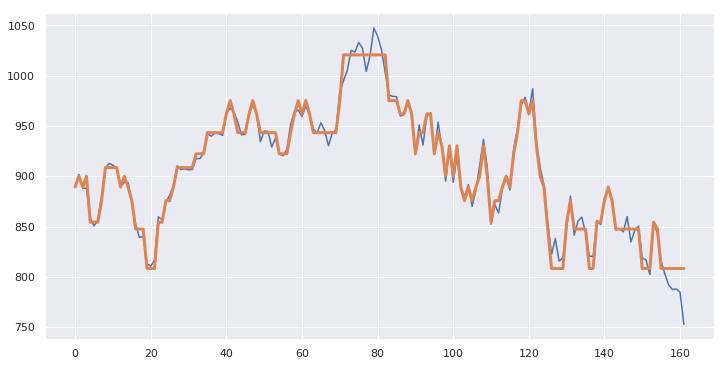

In [10]:
model = GaussianHMM(n_components=13,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)